<center>
    <img src="logo.png" height="300" width="500"/>
        <h1 style='color:#142b5a; font-weight: bold; font-family: Calibri;font-size: 40px; '>  Prediction of Returned Products  </h1>
</center>


 <p style='color:#142b5a; font-weight: bold; font-family: Calibri; font-size:25px;'>🎯 ** Objectives **</p>
 <br>
<div style='color:#142b5a; font-weight: light; font-family: Calibri;'>In this Notebook we will predict the profit with diffrent methods.</div>

<p style='color:#142b5a; font-weight: bold; font-family: Calibri; font-size:25px;'>✔️ ** Outline **</p> 
<br>
<a href="#import" style='color:#142b5a; font-weight: light; font-family: Calibri;'> • Importing necessary libraries</a>
<br>
<br>
<a href="#clean" style='color:#142b5a; font-weight: light; font-family: Calibri;'> • Importing the dataset</a>
<br>
<br>
<a href="#discover" style='color:#142b5a; font-weight: light; font-family: Calibri;'> • Exploring the dataset</a>
<br>
<br>
<a href="#merge" style='color:#142b5a; font-weight: light; font-family: Calibri;'> • Merge of Product and divising it to Product and specification Product</a>
<br>
<br>
<a href="#drop" style='color:#142b5a; font-weight: light; font-family: Calibri;'> • Dropping unnecessary features </a>
<br>
<br>
<a href="#encode" style='color:#142b5a; font-weight: light; font-family: Calibri;'>• Encoding the target Returned</a>
<br>
<br>
<a href="#smote" style='color:#142b5a; font-weight: light; font-family: Calibri;'>Balancing the data with SMOT Algorithm</a>
<br>
<br>
<div>
    <a href="#knn" style='color:#142b5a; font-weight: light; font-family: Calibri;'>• KNN Model</a>
    <br>
    <div>
        <a href="#eval" style='color:#142b5a; font-weight: light; font-family: Calibri; padding:0 0 0 20px'>- Evaluation of the Model</a>
    </div>
</div>
<br>
<div>
    <a href="#svm" style='color:#142b5a; font-weight: light; font-family: Calibri;'>• SVM Model</a>
    <br>
    <div>
        <a href="#pd" style='color:#142b5a; font-weight: light; font-family: Calibri; padding:0 0 0 20px'>- Preparing our data</a>
        <br>
        <a href="#svc" style='color:#142b5a; font-weight: light; font-family: Calibri; padding:0 0 0 20px'>- Support Vector Classifier</a>
        <br>
        <a href="#lk" style='color:#142b5a; font-weight: light; font-family: Calibri; padding:0 0 0 20px'>- Linear Kernel</a>
        <br>
<a href="#pk" style='color:#142b5a; font-weight: light; font-family: Calibri;padding:0 0 0 20px'> - Polynomial Kernel</a>
        <br>
<a href="#sk" style='color:#142b5a; font-weight: light; font-family: Calibri;padding:0 0 0 20px'> - Sigmoid Kernel</a>
        <br>
<a href="#ct" style='color:#142b5a; font-weight: light; font-family: Calibri;padding:0 0 0 20px'> - Comparative Table</a>
    </div>
</div>
<br>
<a href="#xgboost" style='color:#142b5a; font-weight: light; font-family: Calibri;'> • XGBOOST Model</a>
<br>
<br>


<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Calibri;'>
        <center> Importing necessary libraries 📚 </center>
    </h1>
 
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

# Libraries for data visualization
import seaborn as sns
import plotly.express as px
from tqdm.notebook import tqdm
import pygrametl
from pygrametl.tables import Dimension
from pygrametl.tables import FactTable

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline


import xgboost as xgb
import tqdm
import hyperopt
import sys
import scipy

import lightgbm
#from catboost import Pool, CatBoostClassifier, cv, CatboostIpythonWidget

from datetime import datetime
from sklearn.preprocessing import LabelEncoder
# sklearn.cross_validation import cross_val_score, KFold
from sklearn.metrics import log_loss
from sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from IPython.display import display, HTML



#!pip install -U imbalanced-learn


In [2]:
import pyodbc 
conn2 = pyodbc.connect('Driver={SQL Server};'
                      'Server=YOSR;'
                      'Database=DW_projet;'
                      'Trusted_Connection=yes;')

cursor2 = pygrametl.ConnectionWrapper(connection=conn2)

In [3]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<div style='font-size:100%;'>
    <a id='clean'></a>
    <h1 style='color: black; font-weight: bold; font-family: Calibri;'>
        <center> Importing the dataset ⬇️ </center>
    </h1>
</div>

In [5]:
#Importing the table Fact Sales
SQL_Query = pd.read_sql_query('''select * FROM DW_Projet.dbo.FactSales''', conn2)
data = pd.DataFrame(SQL_Query)

#Importing the table DimProduct
SQL_Query = pd.read_sql_query('''select Product_PK,[Product Name] FROM DW_Projet.dbo.DimProduct''', conn2)
dimProduct = pd.DataFrame(SQL_Query)

<div style='font-size:100%;'>
    <a id='discover'></a>
    <h1 style='color: black; font-weight: bold; font-family: Calibri;'>
        <center> Exploring the dataset 🧐 </center>
    </h1>
</div>

In [6]:
data.shape
data.head(7)

,FK_Customer,FK_Product,FK_Ship,FK_Date_Order,FK_Date_Ship,FK_Order,FK_Localisation,Quantity,Profit,Sales,Discount,Returned,Ship_Coast,Ship_Duration
0,87077,129300,5,20120703,20120706,138136,43619,7,-4.21,44.93,0.45,NO,6.91,3
1,87077,129335,8,20150107,20150111,139183,37958,5,-10.44,23.76,0.45,NO,2.84,4
2,87077,130106,5,20120703,20120706,138136,43619,2,-23.53,51.71,0.45,NO,1.77,3
3,87077,130138,5,20120703,20120706,138136,43619,13,-141.96,278.85,0.45,NO,30.01,3
4,87077,130433,5,20120703,20120706,138136,43619,1,-8.53,29.24,0.45,NO,6.66,3
5,87077,130645,8,20150107,20150111,139183,37958,3,35.62,116.17,0.25,NO,10.44,4
6,87078,127444,8,20130516,20130521,134556,44960,7,27.09,2713.41,0.00,NO,167.35,5


<div style='font-size:100%;'>
    <a id='merge'></a>
    <h1 style='color: black; font-weight: bold; font-family: Calibri;'>
        <center> Merge of Product and divising it to Product and specification Product ⬇️ </center>
    </h1>
</div>

In [7]:
dimProduct

,Product_PK,Product Name
0,127283,"Atlantic Metals Mobile 2-Shelf Bookcases, Cust..."
1,127284,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust..."
2,127285,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust..."
3,127286,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust..."
4,127287,Bestar Classic Bookcase
...,...,...
3783,131066,Wilson Electronics DB Pro Signal Booster
3784,131067,Wilson SignalBoost 841262 DB PRO Amplifier Kit
3785,131068,Wireless Extenders zBoost YX545 SOHO Signal Bo...
3786,131069,Xblue XB-1670-86 X16 Small Office Telephone - ...


In [8]:
dimProduct=dimProduct.rename(columns={'Product_PK':'FK_Product'} )
data['FK_Product']=pd.merge(data,dimProduct,on='FK_Product',how='left')['Product Name']

In [9]:
# Extracting Product from FK_Product
data['Product'] = data['FK_Product'].str.split(',').str[0]

# Extracting Month from FK_Product
data['ProductSpecification'] = data['FK_Product'].str.split(',').str[1]


data.head()

,FK_Customer,FK_Product,FK_Ship,FK_Date_Order,FK_Date_Ship,FK_Order,FK_Localisation,Quantity,Profit,Sales,Discount,Returned,Ship_Coast,Ship_Duration,Product,ProductSpecification
0,87077,"Avery Shipping Labels, Alphabetical",5,20120703,20120706,138136,43619,7,-4.21,44.93,0.45,NO,6.91,3,Avery Shipping Labels,Alphabetical
1,87077,"Hon File Folder Labels, Laser Printer Compatible",8,20150107,20150111,139183,37958,5,-10.44,23.76,0.45,NO,2.84,4,Hon File Folder Labels,Laser Printer Compatible
2,87077,"Elite Shears, High Speed",5,20120703,20120706,138136,43619,2,-23.53,51.71,0.45,NO,1.77,3,Elite Shears,High Speed
3,87077,"Fiskars Trimmer, Serrated",5,20120703,20120706,138136,43619,13,-141.96,278.85,0.45,NO,30.01,3,Fiskars Trimmer,Serrated
4,87077,"SanDisk Numeric Keypad, USB",5,20120703,20120706,138136,43619,1,-8.53,29.24,0.45,NO,6.66,3,SanDisk Numeric Keypad,USB


In [10]:
data.describe(include = 'all')

,FK_Customer,FK_Product,FK_Ship,FK_Date_Order,FK_Date_Ship,FK_Order,FK_Localisation,Quantity,Profit,Sales,Discount,Returned,Ship_Coast,Ship_Duration,Product,ProductSpecification
count,51251.00,51251,51251.00,51251.00,51251.00,51251.00,51251.00,51251.00,51251.00,51251.00,51251.00,51251,51251.00,51251.00,51251,43488
unique,NaN,3788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2287,333
top,NaN,Staples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,Staples,Recycled
freq,NaN,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49033,NaN,NaN,222,2085
mean,95803.32,NaN,7.25,20138540.15,20138681.30,141584.61,43034.15,3.48,28.59,246.47,0.14,NaN,26.48,3.97,NaN,NaN
std,5032.61,NaN,1.08,10990.31,11055.42,7431.76,3202.26,2.28,174.37,487.60,0.21,NaN,57.26,1.73,NaN,NaN
min,87077.00,NaN,5.00,20120101.00,20120103.00,128641.00,37211.00,1.00,-6599.98,0.44,0.00,NaN,1.00,0.00,NaN,NaN
25%,91455.00,NaN,7.00,20130619.00,20130623.00,135176.50,40157.00,2.00,0.00,30.74,0.00,NaN,2.61,3.00,NaN,NaN
50%,95800.00,NaN,8.00,20140708.00,20140712.00,141613.00,43280.00,3.00,9.24,85.06,0.00,NaN,7.79,4.00,NaN,NaN
75%,100192.00,NaN,8.00,20150522.00,20150526.00,148048.50,45809.00,5.00,36.81,251.01,0.20,NaN,24.45,5.00,NaN,NaN


<div style='font-size:100%;'>
    <a id='drop'></a>
    <h1 style='color: black; font-weight: bold; font-family: Calibri;'>
        <center> Dropping unnecessary features ⬇️ </center>
    </h1>
</div>

In [11]:
data.drop(['FK_Customer','FK_Product','FK_Ship','FK_Date_Order','FK_Date_Ship','FK_Order','FK_Localisation','ProductSpecification'],inplace = True,axis=1)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Product'] = le.fit_transform(data['Product'])

In [13]:
data

,Quantity,Profit,Sales,Discount,Returned,Ship_Coast,Ship_Duration,Product
0,7,-4.21,44.93,0.45,NO,6.91,3,307
1,5,-10.44,23.76,0.45,NO,2.84,4,1064
2,2,-23.53,51.71,0.45,NO,1.77,3,745
3,13,-141.96,278.85,0.45,NO,30.01,3,850
4,1,-8.53,29.24,0.45,NO,6.66,3,1778
...,...,...,...,...,...,...,...,...
51246,4,11.94,59.94,0.10,NO,2.31,2,1931
51247,2,7.30,87.98,0.40,NO,9.11,7,1969
51248,3,69.74,590.12,0.00,NO,106.68,3,1838
51249,8,25.20,133.68,0.00,NO,4.76,4,1779


<div style='font-size:100%;'>
    <a id='encode'></a>
    <h1 style='color: black; font-weight: bold; font-family: Calibri;'>
        <center> Encoding the target Returned ⬇️ </center>
    </h1>
</div>

In [14]:
data['Returned'] = data['Returned'].replace(['NO'], '0')
data['Returned'] = data['Returned'].replace(['Yes'], '1')
data['Returned']=data['Returned'].apply(int)

In [15]:
target = data['Returned']

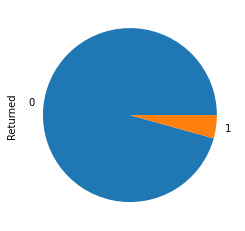

In [16]:
data['Returned'].value_counts().plot.pie()
plt.show()

We noticed that our target Returned is imbalanced

<div style='font-size:100%;'>
    <a id='smote'></a>
    <h1 style='color: black; font-weight: bold; font-family: Calibri;'>
        <center> Balancing the data with SMOT Algorithm⬇️ </center>
    </h1>
</div>

In [17]:
X = data.drop("Returned", axis=1)
y = data["Returned"]

In [18]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (35875, 7)
Number transactions y_train dataset:  (35875,)
Number transactions X_test dataset:  (15376, 7)
Number transactions y_test dataset:  (15376,)


In [19]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1536
Before OverSampling, counts of label '0': 34339 

After OverSampling, the shape of train_X: (68678, 7)
After OverSampling, the shape of train_y: (68678,) 

After OverSampling, counts of label '1': 34339
After OverSampling, counts of label '0': 34339


In [20]:
X_train_res['Returned'] = y_train_res.tolist()

In [21]:
data= X_train_res

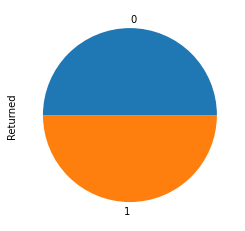

In [22]:
data['Returned'].value_counts().plot.pie()
plt.show()


<div style='font-size:150%;'>
    <a id='knn'></a>
    <h1 style='color:#142b5a; font-weight: bold; font-family: Calibri;'>
        <center>KNN Model</center>
    </h1>
</div>

1-dropping the target

In [23]:
#dropping the target 
X = data.drop("Returned", axis=1)
y = data["Returned"]

2-Splitting the data into data_train and data_test

In [23]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (35875, 7)
Number transactions y_train dataset:  (35875,)
Number transactions X_test dataset:  (15376, 7)
Number transactions y_test dataset:  (15376,)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

3-Searching for the best value of k with KNeighborsClassifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error = []
# Calculate the error for k between 1 and 40
#For each iteration, the average error for the predicted values
# of the test set is calculated and saved in the Error list.
# Test k from 1 to 40 and Manhattan distance
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

4-Model tuning (Hyperparameter Tuning):

Searching through gridsearch for the best hyperparameters.


In [ ]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,20))# Par défaut c'est 30
n_neighbors = list(range(1,25))  
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)  
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
# Show the settings that give the best performance
best_parameters = clf.best_params_
print(best_parameters)

In [ ]:
#Good classification rate
best_result = clf.best_score_
print(best_result)

5-Training phase:
Apply the KNN model with the training data

In [26]:
knn = KNeighborsClassifier(8,p=1,leaf_size=1 )
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

<div style='font-size:100%;'>
    <a id='eval'></a>
    <h1 style='color: black; font-weight: bold; font-family: Calibri;'>
        <center> Evaluation of the Model⬇️ </center>
    </h1>
</div>

In [27]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.96


In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[14694     0]
 [  682     0]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14694
           1       0.00      0.00      0.00       682

    accuracy                           0.96     15376
   macro avg       0.48      0.50      0.49     15376
weighted avg       0.91      0.96      0.93     15376



<div style='font-size:150%;'>
    <a id='svm'></a>
    <h1 style='color:#142b5a; font-weight: bold; font-family: Calibri;'>
        <center>SVM Model</center>
    </h1>
</div>

<div style='font-size:100%;'>
    <a id='pd'></a>
    <h1 style='color: black; font-weight: bold; font-family: Calibri;'>
        <center> Preparing our data </center>
    </h1>
</div>

In [30]:
X = data.drop("Returned", axis=1)
y = data["Returned"]

In [31]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (48074, 7)
Number transactions y_train dataset:  (48074,)
Number transactions X_test dataset:  (20604, 7)
Number transactions y_test dataset:  (20604,)


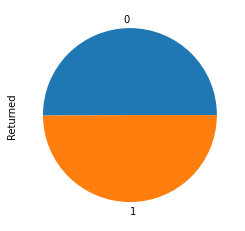

In [32]:
y_train.value_counts().plot.pie()
plt.show()

<div style='font-size:100%;'>
    <a id='SVC'></a>
    <h1 style='color: black; font-weight: bold; font-family: Calibri;'>
        <center> Support Vector Classifier</center>
    </h1>
</div>

In [ ]:
#Training svm model
svm = SVC()
svm.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))

<div style='font-size:100%;'>
    <a id='lk'></a>
    <h1 style='color: black; font-weight: bold; font-family: Calibri;'>
        <center> Linear Kernel </center>
    </h1>
</div>

In [ ]:
# Kernel linear
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_2 = svm.predict(X_test)
print(classification_report(y_pred_svc_2, y_test))

<div style='font-size:100%;'>
    <a id='pk'></a>
    <h1 style='color: black; font-weight: bold; font-family: Calibri;'>
        <center> Polynomial Kernel </center>
    </h1>
</div>

In [ ]:
# Kernel poly
svm = SVC(kernel="poly")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_3 = svm.predict(X_test)
print(classification_report(y_pred_svc_3, y_test))

<div style='font-size:100%;'>
    <a id='sk'></a>
    <h1 style='color: black; font-weight: bold; font-family: Calibri;'>
        <center> Sigmoid Kernel </center>
    </h1>
</div>

In [ ]:
# Kernel sigmoid
svm = SVC(kernel="sigmoid")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_4 = svm.predict(X_test)
print(classification_report(y_pred_svc_4, y_test))

The kernel scores for this dataset are:
1. Support Vector Classifier : 0.56
2. Linear Kernel : 0.54
3. Polynomial Kernel : 0.96
4. Sigmoid Kernel : 0.95

We can conclude that the data follows a polynomial form more than a linear form.

### Noyeau Gaussien RBF

In [ ]:
# Kernel rbf (Par défaut)
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_pred, y_test))

<div style='font-size:100%;'>
    <a id='ct'></a>
    <h1 style='color: black; font-weight: bold; font-family: Calibri;'>
        <center> Comparative Table </center>
    </h1>
</div>

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# We will display a table which orders the models from the most efficient to the least efficient according to the score
s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4)

models = pd.DataFrame({
    'Model': ['Support Vector Machines RBF', 'Support Vector Machines Linaire','Support Vector Machines polynomiale',
              'Support Vector Machines sigmoïde'],
    'Score': [s1,s2, s3, 
              s4]})
models.sort_values(by="Score",ascending=False)

<div style='font-size:150%;'>
    <a id='xgboost'></a>
    <h1 style='color:#142b5a; font-weight: bold; font-family: Calibri;'>
        <center>XGBOOST Model</center>
    </h1>
</div>

In [33]:
SQL_Query = pd.read_sql_query('''select * FROM DW_projet.dbo.factSales''', conn2)
data = pd.DataFrame(SQL_Query)

In [34]:
X = data.drop("Returned", axis=1)
y = data["Returned"]

In [35]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (35875, 13)
Number transactions y_train dataset:  (35875,)
Number transactions X_test dataset:  (15376, 13)
Number transactions y_test dataset:  (15376,)


In [36]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 0
Before OverSampling, counts of label '0': 0 

After OverSampling, the shape of train_X: (68678, 13)
After OverSampling, the shape of train_y: (68678,) 

After OverSampling, counts of label '1': 0
After OverSampling, counts of label '0': 0


In [37]:
X_train_res['Returned'] = y_train_res.tolist()

In [38]:
data= X_train_res

# Dividing variables into categorical and Numeric


In [39]:
data = data.drop(['FK_Customer','FK_Product','FK_Ship','FK_Date_Order','FK_Date_Ship','FK_Order','FK_Localisation'],axis=1)
vars=data.dtypes
categorical=[]
numeric=[]
for i in range(0,len(vars)):
    if vars[i]=="object": 
        categorical.append(data.columns[i])
    else:
        numeric.append(data.columns[i]) 

In [40]:
numeric

['Quantity', 'Profit', 'Sales', 'Discount', 'Ship_Coast', 'Ship_Duration']

In [41]:
categorical

['Returned']

In [42]:
data

,Quantity,Profit,Sales,Discount,Ship_Coast,Ship_Duration,Returned
0,2,4.30,8.96,0.00,1.62,5,NO
1,3,40.23,160.92,0.00,10.98,7,NO
2,5,76.20,363.30,0.00,37.78,2,NO
3,2,-34.76,185.38,0.20,28.86,2,NO
4,2,-8.15,121.93,0.10,5.20,5,NO
...,...,...,...,...,...,...,...
68673,1,-4.84,9.74,0.60,1.80,3,Yes
68674,1,25.69,129.26,0.09,21.33,3,Yes
68675,1,-5.05,126.13,0.09,7.04,6,Yes
68676,2,7.63,77.71,0.00,3.55,5,Yes


# Variable processing

In [43]:
#lable encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
df1=data[categorical].apply(LabelEncoder().fit_transform)
df2=data[numeric]
df3=pd.concat([df1, df2], axis=1)

In [44]:
df3

,Returned,Quantity,Profit,Sales,Discount,Ship_Coast,Ship_Duration
0,0,2,4.30,8.96,0.00,1.62,5
1,0,3,40.23,160.92,0.00,10.98,7
2,0,5,76.20,363.30,0.00,37.78,2
3,0,2,-34.76,185.38,0.20,28.86,2
4,0,2,-8.15,121.93,0.10,5.20,5
...,...,...,...,...,...,...,...
68673,1,1,-4.84,9.74,0.60,1.80,3
68674,1,1,25.69,129.26,0.09,21.33,3
68675,1,1,-5.05,126.13,0.09,7.04,6
68676,1,2,7.63,77.71,0.00,3.55,5


# Split data in Train and Test datsets

In [45]:
train, test = train_test_split(df3, test_size=0.2)
Returned_X =train['Returned'] 
train = train.drop(['Returned'],axis=1)
Returned_Y =test['Returned'] 
test = test.drop(['Returned'],axis=1)

In [46]:
train

,Quantity,Profit,Sales,Discount,Ship_Coast,Ship_Duration
1182,3,2.97,60.48,0.00,4.58,7
38029,2,42.91,114.18,0.00,31.52,1
53724,4,8.33,40.54,0.15,12.23,3
56753,5,124.79,293.02,0.00,54.55,3
15425,6,13.50,42.30,0.00,2.87,6
...,...,...,...,...,...,...
68317,1,8.64,48.69,0.39,2.39,3
31739,5,-271.50,424.20,0.50,46.78,4
57577,1,-0.77,119.47,0.09,12.28,4
59056,1,4.16,19.26,0.00,1.51,4


In [47]:
test

,Quantity,Profit,Sales,Discount,Ship_Coast,Ship_Duration
25797,3,23.31,155.52,0.00,16.58,2
10097,5,4.65,236.70,0.00,19.36,4
54155,1,-10.72,34.71,0.22,9.12,3
68055,2,21.02,80.67,0.13,13.50,3
51388,1,-25.60,48.33,0.40,3.38,4
...,...,...,...,...,...,...
46869,2,-0.18,37.06,0.14,3.74,4
54334,2,145.34,428.09,0.00,51.15,3
49702,10,61.63,501.48,0.20,29.62,4
36941,3,-95.48,47.02,0.70,6.38,5


In [48]:
Returned_X.sum()

27414

In [49]:
Returned_Y.sum()

6925

# Xgboost Model

In [50]:
gbm = xgb.XGBClassifier(max_depth=2, n_estimators=100, learning_rate=1).fit(train,Returned_X)
predictions = gbm.predict(test)
accuracy_score(Returned_Y, predictions)

0.755387303436226

In [51]:
predictions.sum()

5533

In [ ]:
import graphviz
fig, ax = plt.subplots(figsize=(100, 100))
xgb.plot_tree(gbm, num_trees=4, ax=ax)
plt.show()